[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM-examples.git/main?urlpath=PySDM_examples/Lowe_et_al_2019/fig_2.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/Lowe_et_al_2019/fig_2.ipynb)

#### based on Example Figure from Pyrcel code documentation https://pyrcel.readthedocs.io/en/latest/examples/basic_run.html

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install "atmos-cloud-sim-uj-utils
    from atmos_cloud_sim_uj_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
from PySDM_examples.Pyrcel import Settings, Simulation
from PySDM_examples.Pyrcel.aerosol import AerosolMarine

from atmos_cloud_sim_uj_utils import show_plot

from PySDM.initialisation import spectra
from PySDM.initialisation.sampling import spectral_sampling as spec_sampling
from PySDM.physics import si

import numpy as np
from matplotlib import pylab

0.7239593897104454
1.3317095696788486


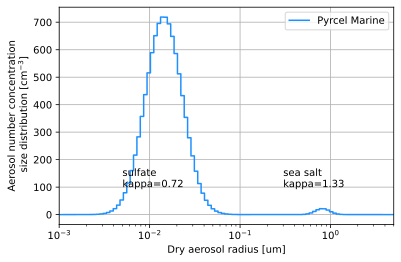

HTML(value="<a href='./size_dist.pdf' target='_blank'>./size_dist.pdf</a><br>")

In [3]:
aerosol = AerosolMarine()
print(aerosol.aerosol_modes_per_cc[0]['kappa'])
print(aerosol.aerosol_modes_per_cc[1]['kappa'])

x = np.logspace(np.log(1 * si.nm), np.log(5000 * si.nm), base=np.e, num=100)
spec = spectra.Sum(
    tuple(aerosol.aerosol_modes_per_cc[i]['spectrum'] for i in range(len(aerosol.aerosol_modes_per_cc)))
)
pylab.step(x / si.um, spec.size_distribution(x)*x / si.cm**-3, label="Pyrcel Marine", color=aerosol.color)
pylab.xlim(1e-3, 5e0)
pylab.xscale('log')
pylab.legend()
pylab.grid()
pylab.xlabel('Dry aerosol radius [um]')
pylab.ylabel('Aerosol number concentration\n size distribution [cm$^{-3}$]')
pylab.text(5e-3, 100, f"sulfate\nkappa={aerosol.aerosol_modes_per_cc[0]['kappa']:.2f}")
pylab.text(3e-1, 100, f"sea salt\nkappa={aerosol.aerosol_modes_per_cc[1]['kappa']:.2f}")
show_plot("size_dist.pdf")

In [4]:
output = {}
key = f"{aerosol.__class__.__name__}"
settings = Settings(
    dt=1*si.s, n_sd_per_mode=100, 
    aerosol=aerosol,
    spectral_sampling=spec_sampling.ConstantMultiplicity
)

simulation = Simulation(settings)
output[key] = simulation.run()
output[key]['color'] = aerosol.color

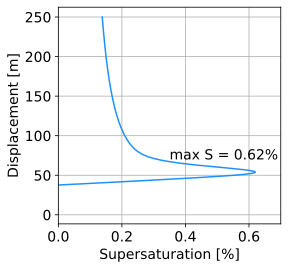

HTML(value="<a href='./supersaturation.pdf' target='_blank'>./supersaturation.pdf</a><br>")

In [5]:
pylab.rc('font', size=14)
fig, ax = pylab.subplots(1, 1, figsize=(4, 4), sharey=True)

var='S_max'
for key, out_item in output.items():
    Y = np.asarray(out_item['z'])
    ax.plot(out_item[var], Y, label=key, 
                  color=out_item['color'],
                  linestyle='-'
                 )
    peakSS = np.nanmax(out_item[var])

ax.set_ylabel('Displacement [m]')
ax.set_xlabel('Supersaturation [%]')
ax.set_xlim(0, 0.7)
ax.text(0.35,70,f"max S = {peakSS:.2f}%")
  
ax.grid()
show_plot("supersaturation.pdf")